# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [2]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [30]:
baby_names = pd.read_csv("lab12_files/US_Baby_Names_right.csv")
baby_names

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
...,...,...,...,...,...,...,...
1016390,5647421,5647422,Seth,2014,M,WY,5
1016391,5647422,5647423,Spencer,2014,M,WY,5
1016392,5647423,5647424,Tyce,2014,M,WY,5
1016393,5647424,5647425,Victor,2014,M,WY,5


Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [27]:
print(type(baby_names))
print(len(baby_names))

<class 'pandas.core.frame.DataFrame'>
1016395


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [29]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [31]:
baby_names.drop(columns=["Unnamed: 0", "Id"], axis = 1)

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [52]:
female = baby_names['Gender'] == 'F'
male =  baby_names['Gender'] == 'M'

f = baby_names[female]['Gender'].count()
m = baby_names[male]['Gender'].count()

f,m

(558846, 457549)

Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [72]:
baby_names['Name'].value_counts()[:10]
common_names = baby_names['Name'].value_counts()[:10]
common_names

Name
Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Dakota     962
Name: count, dtype: int64

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

<Axes: xlabel='Name'>

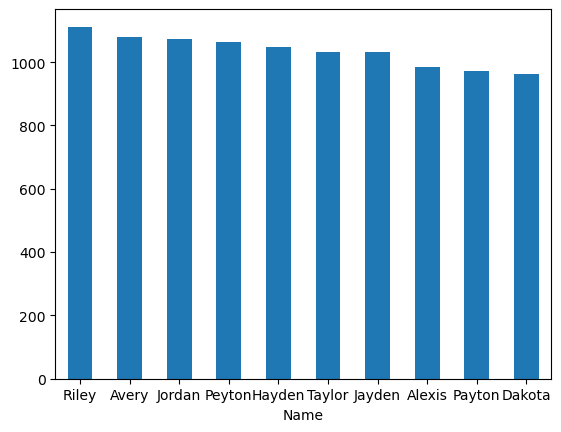

In [73]:
import matplotlib as plt
common_names.plot.bar(x = 'Name', y = 'Count', rot = 0)


<Axes: xlabel='Name'>

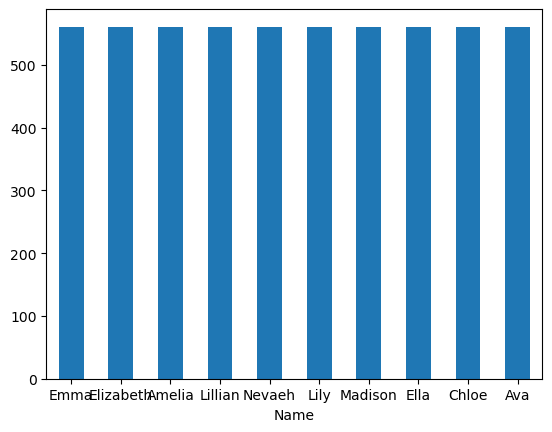

In [84]:
female_names = baby_names[baby_names["Gender"]=='F']['Name'].value_counts()[:10]
female_names.plot.bar(x='Name', y ='Count', rot = 0)

<Axes: xlabel='Name'>

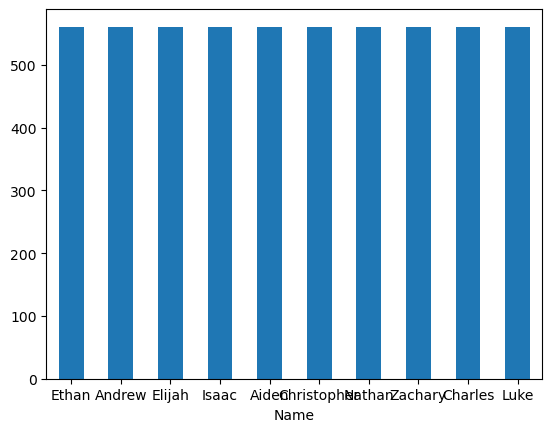

In [85]:
male_names = baby_names[baby_names["Gender"]=='M']['Name'].value_counts()[:10]
male_names.plot.bar(x='Name', y ='Count', rot = 0)

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [47]:
baby_names['Name'].nunique()

17632

Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [57]:
import numpy as np

np.random.choice(baby_names['Name'].values)

'Cristal'

Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [70]:
most_common = baby_names['Name'].mode()[0]
display(most_common)
baby_names['Name'].value_counts().describe()


'Riley'

count    17632.000000
mean        57.644907
std        122.029964
min          1.000000
25%          2.000000
50%          8.000000
75%         39.000000
max       1112.000000
Name: count, dtype: float64

## Część II

Krok 1: Wczytaj dane

In [13]:
occupation = pd.read_csv('lab12_files/ocupation.csv', sep='|')

Krok 2: Podejrzyj pierwsze 25 rekordów

In [14]:
occupation.head(25)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [15]:
occupation.tail(10)

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [16]:
display(len(occupation))
display(len(occupation.columns))

943

5

Krok 5: Wypisz nazwy kolumn

In [17]:
display(occupation.columns)

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

Krok 6: Ile różnych zawodów jest w zbiorze?

In [18]:
occupation['occupation'].nunique()

21

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

<Axes: ylabel='count'>

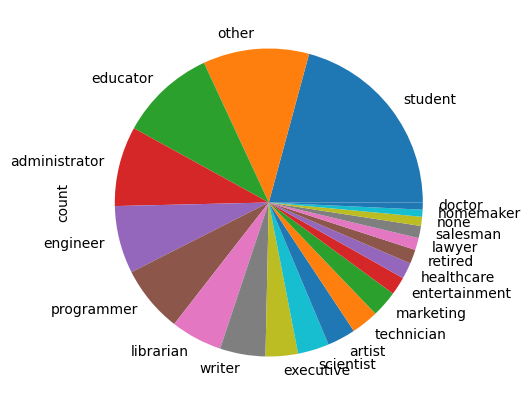

In [28]:
import matplotlib.pyplot as plt
pie_plot= occupation['occupation'].value_counts().sort_values(ascending=False)
pie_plot.plot(kind='pie',figsize=(5,5))

<Axes: ylabel='count'>

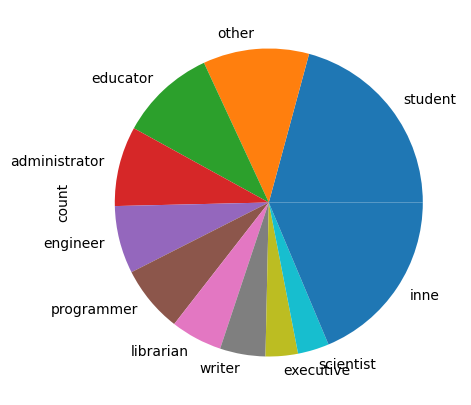

In [27]:
most_common = pie_plot[:10]
most_common['inne'] = pie_plot[10:].sum()

most_common.plot(kind ='pie', figsize=(5,5))


Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

<Axes: xlabel='occupation'>

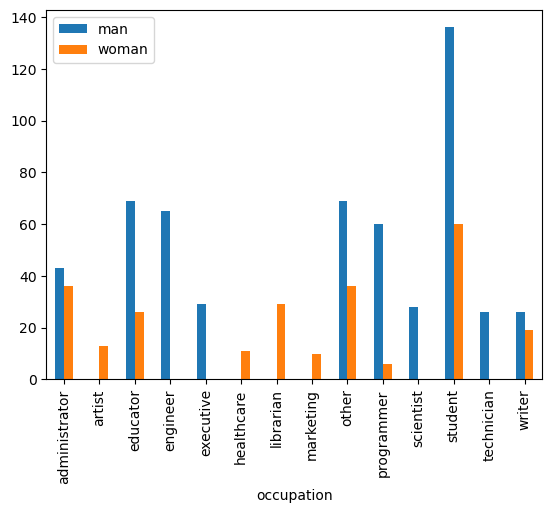

In [34]:
man = occupation[occupation['gender']=='M']['occupation'].value_counts().sort_values(ascending=False)[:10]
woman = occupation[occupation['gender']=='F']['occupation'].value_counts().sort_values(ascending=False)[:10]
plotdata = pd.DataFrame({
    'man': man,
    'woman': woman
})
plotdata.plot(kind="bar")

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

<Axes: xlabel='occupation'>

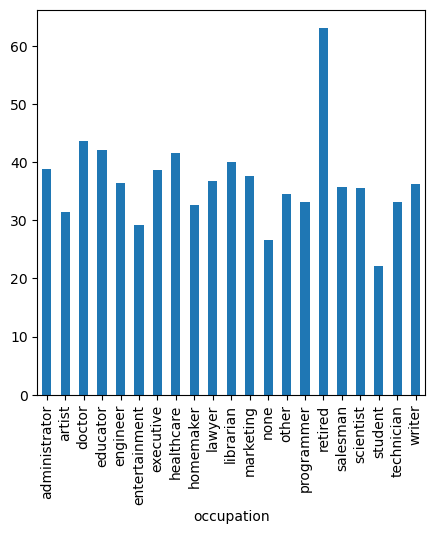

In [38]:
occupation.groupby('occupation')['age'].mean().plot.bar(figsize=(5, 5))


Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

<Axes: xlabel='occupation'>

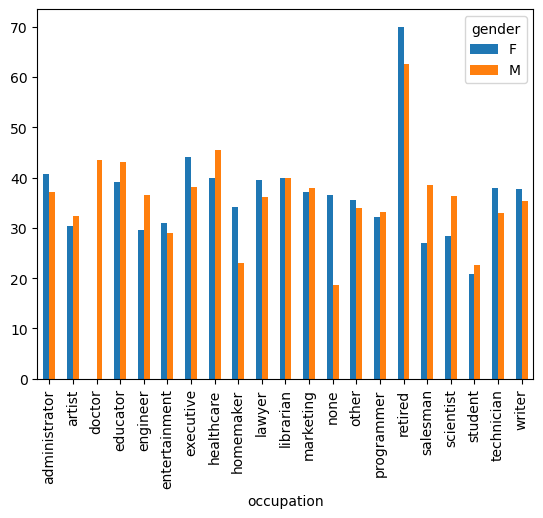

In [42]:
occupation.groupby(['occupation', 'gender'])['age'].mean().unstack('gender').plot(kind='bar')
